Данные ноутбук использовался для генерации данных для отчета. 

In [10]:
from artm_experiments import Experiment, Pool, OptimizationTopicsFilter
from artm import *
import glob
import os
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



`%matplotlib` prevents importing * from pylab and numpy


In [11]:
batch_vectorizer = BatchVectorizer(data_path='kos', data_format='batches')

def create_model():
    model_artm = ARTM(num_topics=50,
                      scores=[PerplexityScore(name='PerplexityScore',
                                              use_unigram_document_model=False,
                                              dictionary_name='dictionary')],
                      regularizers=[SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.05),
                                    DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=0.5e+5)])

    if not os.path.exists('kos/dictionary.dict'):
        model_artm.gather_dictionary(dictionary_target_name='dictionary', 
                                     data_path='kos', vocab_file_path='vocab.kos.txt')
        model_artm.save_dictionary(dictionary_name='dictionary', dictionary_path='kos/dictionary.dict')
    else:
        model_artm.load_dictionary(dictionary_name='dictionary', dictionary_path='kos/dictionary.dict')
    model_artm.initialize(dictionary_name='dictionary', seed=np.random.randint(1000000))

    return model_artm

In [12]:
def display_points(phi):
    points = ConvexHullTopicsFilter.project_points(phi.as_matrix().T, dim=2)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(points[:, 0], points[:, 1], marker='o', ls='')
    for i in xrange(phi.shape[1]):
        ax.annotate(phi.columns[i], xy=points[i], textcoords='offset points')
        
    plt.show()
    
def save_hist(vals, bins, filename):
    bins = (bins[:-1] + bins[1:]) / 2.0
    np.savetxt(filename, np.vstack((bins, vals)).T, delimiter=',')

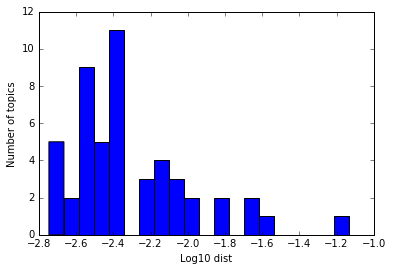

34


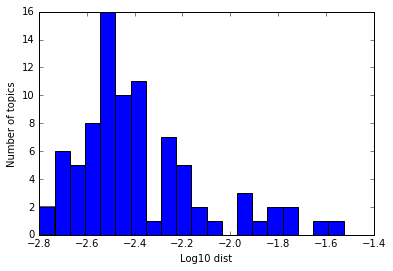

52


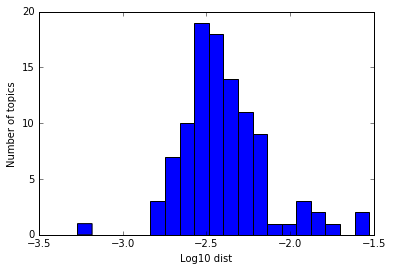

65


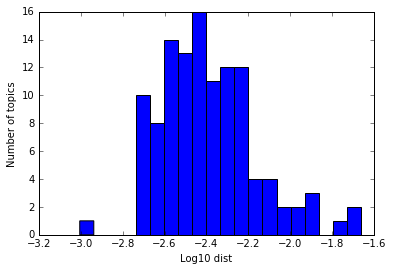

75


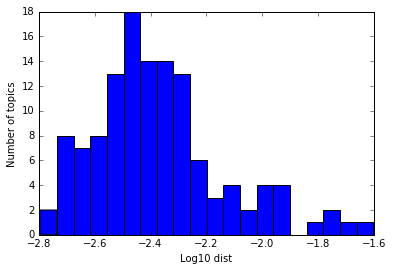

88


In [14]:
exp = Experiment(Pool(topics_filter=OptimizationTopicsFilter(eps=10 ** (-2.5), verbose=False), 
                      save_topics=True))
for i in xrange(5):
    model_artm = create_model()
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15, num_document_passes=1)
    #display_points(model_artm.get_phi())
    exp.collect_topics(model_artm.get_phi(), model_artm.get_theta())
    vals, bins = exp.topics_pool.topics_filter.plot_hist()
    save_hist(vals, bins, "data_iter_{}.csv".format(i))
    print exp.topics_pool.get_basic_topics_count()

In [15]:
from sklearn.metrics.pairwise import cosine_distances
for topic in exp.topics_pool.get_all_topics():
    print topic, cosine_distances([exp.topics_pool.topics_filter.projections[topic]], 
                                  [exp.topics_pool.phi[topic]])[0, 0]

topic0 0.103305838255
topic1 0.426025051906
topic2 0.131391637136
topic3 0.507102271062
topic4 0.0575017784341
topic5 0.51310378091
topic6 0.740033987367
topic7 0.326174301239
topic8 0.582034755284
topic9 0.478538417522
topic10 0.817109713123
topic11 0.75396397392
topic12 0.0652262265686
topic13 0.784028011329
topic14 0.736844922111
topic15 0.380231008739
topic16 0.817385682085
topic17 0.829109763379
topic18 0.778441189072
topic19 0.753042661666
topic20 0.67733954534
topic21 0.722559466406
topic22 0.775422258589
topic23 0.744659630433
topic24 0.154483787043
topic25 0.749251583154
topic26 0.445303106818
topic27 0.781435151322
topic28 0.728642967817
topic29 0.726303652373
topic30 0.585651713319
topic31 0.717412894634
topic32 0.28066230336
topic33 0.736473119885
topic34 0.748524903243
topic35 0.0897049780377
topic36 0.820610674695
topic37 0.373010919601
topic38 0.529253008534
topic39 0.241173890986
topic40 0.133822213815
topic41 0.400962641053
topic42 0.778828675312
topic43 0.125502587752

In [16]:
print exp.topics_pool.get_top_words_by_vector(exp.topics_pool.topics_filter.projections['topic67'], words_number=20)
print exp.topics_pool.get_top_words_by_topic('topic67', words_number=20)

[u'media' u'vote' u'polls' u'primary' u'lead' u'voted' u'turnout' u'zogby'
 u'final' u'voter' u'race' u'running' u'exit' u'dem' u'political'
 u'electoral' u'governor' u'needed' u'advertising' u'data']
[u'vote' u'media' u'polls' u'voter' u'news' u'voting' u'voted' u'votes'
 u'oct' u'advertising' u'nov' u'dem' u'registration' u'popular' u'exit'
 u'convention' u'needed' u'report' u'nader' u'information']


In [17]:
print exp.topics_pool.get_top_words_by_vector(exp.topics_pool.topics_filter.projections['topic69'], words_number=20)
print exp.topics_pool.get_top_words_by_topic('topic69', words_number=20)

[u'million' u'money' u'bushs' u'ads' u'raised' u'jobs' u'spending'
 u'fundraising' u'spend' u'candidates' u'campaigns' u'cash' u'spent'
 u'knowles' u'raise' u'economy' u'record' u'month' u'murkowski' u'dnc']
[u'million' u'money' u'ads' u'spent' u'raised' u'medicare' u'groups'
 u'month' u'dollars' u'leading' u'spend' u'raise' u'television' u'raising'
 u'spending' u'contract' u'private' u'kerrys' u'weeks' u'funding']


In [18]:
exp.show_all_topics(sort_by_closest_topic=True)

topic103 | [u'elections' u'carson' u'dkos' u'oklahoma' u'coburn'] | topic103
topic106 | [u'results' u'trend' u'lines' u'research' u'surveyusa'] | topic106
topic108 | [u'primary' u'running' u'governor' u'dem' u'seat'] | topic108
topic109 | [u'colorado' u'races' u'miller' u'salazar' u'knowles'] | topic109
topic35 | [u'race' u'elections' u'seat' u'district' u'knowles'] | topic113
topic77 | [u'race' u'elections' u'seat' u'candidate' u'democrat'] | topic113
topic113 | [u'race' u'gop' u'incumbent' u'voters' u'won'] | topic113
topic118 | [u'alexander' u'challenge' u'bob' u'protests' u'dccc'] | topic118
topic178 | [u'ndn' u'sen' u'dole' u'alexander' u'mike'] | topic118
topic29 | [u'raised' u'colorado' u'win' u'money' u'strong'] | topic120
topic120 | [u'money' u'raised' u'dnc' u'campaigns' u'fundraising'] | topic120
topic53 | [u'south' u'herseth' u'dakota' u'daschle' u'diedrich'] | topic121
topic121 | [u'south' u'herseth' u'dakota' u'seat' u'daschle'] | topic121
topic206 | [u'south' u'herseth' 

In [21]:
exp.topics_pool.get_dist_between_topics('topic183', 'topic180')

0.06074640899896622

In [22]:
exp.show_next_topics_batch(10)

topic247:
[u'president' u'time' u'bushs' u'john' u'white']
topic78:
[u'percent' u'numbers' u'undecided' u'favorable' u'pdf']
topic21:
[u'senator' u'bunning' u'miller' u'mongiardo' u'jim']
topic51:
[u'exit' u'select' u'san' u'return' u'francisco']
topic169:
[u'carson' u'coburn' u'governor' u'oklahoma' u'falling']
topic171:
[u'party' u'state' u'candidates' u'candidate' u'win']
topic243:
[u'iraqi' u'officials' u'iraqis' u'official' u'chalabi']
topic205:
[u'media' u'advertising' u'positive' u'stay' u'bob']
topic39:
[u'republican' u'party' u'gop' u'political' u'national']
topic106:
[u'results' u'trend' u'lines' u'research' u'surveyusa']


In [34]:
exp.save_dataset_to_navigator()

In [35]:
exp.save_next_topics_batch_ to_navigator(15)

In [ ]:
exp.load_assessments_from_navigator()

In [ ]:
exp.show_assessments()